In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#源文章来自：https://ask.hellobi.com/blog/qinlu/8929

In [105]:
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_csv('/Users/qingmo/Downloads/python/CDNOW_master.txt',names=columns,sep='\s+')

In [106]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [107]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [109]:
df['order_date']=pd.to_datetime(df.order_dt,format='%Y%m%d')
#时间类型的转换，将特定的字符串或者数字转换成时间格式

In [110]:
df['month']=df.order_date.values.astype('datetime64[M]')
#astype也可以将时间格式进行转换，比如[M]转化成月份。我们将月份作为消费行为的主要时间窗口，选择哪种
#种时间窗口取决于消费频率

In [111]:
df.head()
#可以发现month时间变成了每个月月份的开头

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
order_date        69659 non-null datetime64[ns]
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


In [113]:
user_grouped=df.groupby('user_id').sum()
user_grouped.head()
#为groupby创建一个新对象，转换成每个用户的角度看到以下数据

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [114]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


In [115]:
#从用户角度，每个用户平均购买了7张CD，最多的用户购买了1033张。
#用户平均消费金额在106元，标准差在240元

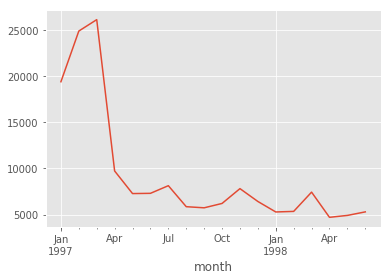

In [116]:
#接下来按月的维度分析
df.groupby('month').order_products.sum().plot()

In [117]:
#按月统计每月CD的销量。前几个月高涨，而后期销量平稳。为什么会出现这样的问题呢？
#我们假设是用户身上出了问题，早期时间段的用户中有异常值，第二假设是各类促销营销，
#但是这里只有消费数据，所以无法判断

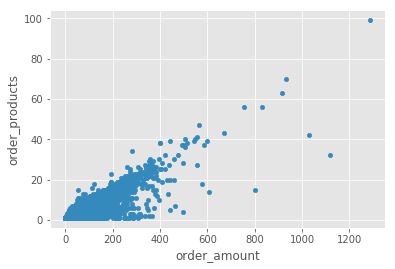

In [118]:
df.plot.scatter(x='order_amount',y='order_products')

In [119]:
#绘制每笔订单的散点图。从图中观察，订单消费金额和订单商品量呈规律性。
#订单的极致较少，显然不是异常波动的罪魁祸首

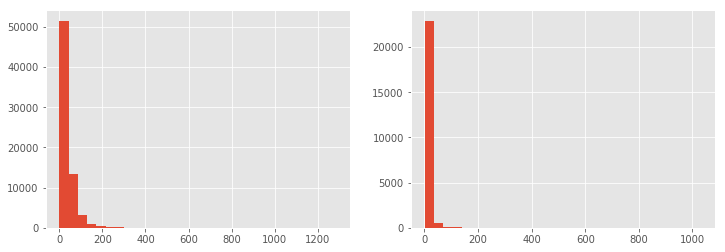

In [120]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.order_amount.hist(bins=30)

plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins=30)

plt.subplot用于绘制子图，子图用数字参数表示。121表示分成1*2个图片区域，占用第一个，即第一行第一列，122表示占用第二个。figure是尺寸函数，为了容纳两张子图，宽设置的大一点即可。

从直方图看，大部分用户的消费能力确实不高，高消费用户在图上几乎看不到。

In [121]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

用groupby函数将用户分组，并且求月份的最小值，最小值即用户消费行为中的第一次消费时间。可以看出，所有用户第一次消费都集中在前三个月。

In [122]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

观察用户的最后一次消费时间。绝大部分数据依然集中在前三个月。后续的时间段内，依然有用户在消费，但是缓慢减少。
异常趋势的原因获得了解释，现在针对消费数据进一步细分。我们要明确，这只是部分用户的订单数据，所有有一定的局限性。在这里我们将数据上消费的用户定义为新客。
接下来分析消费中的复购率和回购率。

In [123]:
#首先将用户消费数据进行数据透视
pivoted_counts=df.pivot_table(index='user_id',columns='month',
                             values='order_dt',aggfunc='count').fillna(0)
columns_month=df.month.sort_values().astype('str').unique()
pivoted_counts.columna=columns_month
pivoted_counts.head()

/Users/qingmo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


在pandas中，数据透视有专门的函数pivot_table，功能非常强大。pivot_table参数中，index是设置数据透视后的索引，column是设置数据透视后的列，简而言之，index是你想要的行，column是想要的列。案例中，我希望统计每个用户在每月的订单量，所以user_id是index，month是column。

values是将哪个值进行计算，aggfunc是用哪种方法。于是这里用values=order_dt和aggfunc=count，统计里order_dt出现的次数，即多少笔订单。

使用数据透视表，需要明确获得什么结果。有些用户在某月没有进行过消费，会用NaN表示，这里用fillna填充。

生成的数据透视，月份是1997-01-01 00:00:00表示，比较丑。将其优化成标准格式。

首先求复购率，复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户。

将数据转换一下，消费两次及以上记为1，消费一次记为0，没有消费记为NaN。

In [124]:
#数据转换一下，消费两次及以上记为1，消费一次记做0，没有消费记做NaN
pivoted_counts_transf=pivoted_counts.applymap(lambda x:1 if x>1
                                             else np.NaN if x==0
                                             else 0)
pivoted_counts_transf.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


applymap针对DataFrame里的所有数据。用lambda进行判断，因为这里涉及了多个结果，所以要两个if else，记住，lambda没有elif的用法。

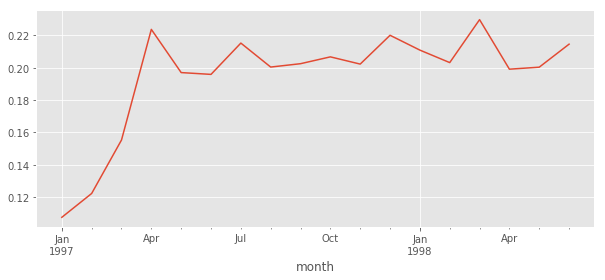

In [125]:
(pivoted_counts_transf.sum() / pivoted_counts_transf.count()).plot(figsize=(10,4))

用sum和count相除即可计算出复购率。因为这两个函数都会忽略NaN，而NaN是没有消费的用户，count不论0还是1都会统计，所以是总的消费用户数，而sum求和计算了两次以上的消费用户。这里用了比较巧妙的替代法计算复购率，SQL中也可以用。

图上可以看出复购率在早期，因为大量新用户加入的关系，新客的复购率并不高，譬如1月新客们的复购率只有6%左右。而在后期，这时的用户都是大浪淘沙剩下的老客，复购率比较稳定，在20%左右。

单看新客和老客，复购率有三倍左右的差距。

接下来计算回购率。回购率是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。我1月消费用户1000，他们中有300个2月依然消费，回购率是30%。

In [126]:
#回购率的计算比较难，因为它涉及了横向跨时间窗口的对比
pivoted_amount=df.pivot_table(index='user_id',columns='month'
                             ,values='order_amount',aggfunc='mean').fillna(0)
columns_month=df.month.sort_values().astype('str').unique()
pivoted_amount.columns=columns_month

In [127]:
pivoted_amount.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


将消费金额进行数据透视，这里作为练习，使用了平均值

In [128]:
pivoted_purchase=pivoted_amount.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [129]:
#再次用applymap+lambda转换器，只要有过购买，记为1，反之0
def purchase_return(data):
    status=[]
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status


#pivoted_amount=df.pivot_table(index='user_id',columns='month'
#                             ,values='order_amount',aggfunc='mean').fillna(0)
#columns_month=df.month.sort_values().astype('str').unique()
#pivoted_amount.columns=columns_month

#pivoted_purchase_return=

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.head(5)

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4    [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5    [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
dtype: object

In [130]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figseze=(10,4))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

新建一个判断函数。data是输入的数据，即用户在18个月内是否消费的记录，status是空列表，后续用来保存用户是否回购的字段。

因为有18个月，所以每个月都要进行一次判断，需要用到循环。if的主要逻辑是，如果用户本月进行过消费，且下月消费过，记为1，没有消费过是0。本月若没有进行过消费，为NaN，后续的统计中进行排除。

用apply函数应用在所有行上，获得想要的结果。

最后的计算和复购率大同小异，用count和sum求出。从图中可以看出，用户的回购率高于复购，约在30%左右，波动性也较强。新用户的回购率在15%左右，和老客差异不大。

将回购率和复购率综合分析，可以得出，新客的整体质量低于老客，老客的忠诚度（回购率）表现较好，消费频次稍次，这是CDNow网站的用户消费特征。

接下来进行用户分层，我们按照用户的消费行为，简单划分成几个维度：新用户、活跃用户、不活跃用户、回流用户。

新用户的定义是第一次消费。活跃用户即老客，在某一个时间窗口内有过消费。不活跃用户则是时间窗口内没有消费过的老客。回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。以上的时间窗口都是按月统计。

比如某用户在1月第一次消费，那么他在1月的分层就是新用户；他在2月消费国，则是活跃用户；3月没有消费，此时是不活跃用户；4月再次消费，此时是回流用户，5月还是消费，是活跃用户。

分层会涉及到比较复杂的逻辑判断。

In [131]:
def active_status(data):
    status=[]
    for i in range(18):
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('now')
                else:
                    status.append('active')
                    
    return status

pivoted_purchase_status=pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status.head()

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

函数写得比较复杂，主要分为两部分的判断，以本月是否消费为界。本月没有消费，还要额外判断他是不是新客，因为部分用户是3月份才消费成为新客，那么在1、2月份他应该连新客都不是，用unreg表示。如果是老客，则为unactive。

本月若有消费，需要判断是不是第一次消费，上一个时间窗口有没有消费。大家可以多调试几次理顺里面的逻辑关系，对用户进行分层，逻辑确实不会简单，而且这里只是简化版本的

从结果看，用户每个月的分层状态以及变化已经被我们计算出来。我是根据透视出的宽表计算，其实还有一种另外一种写法，只提取时间窗口内的数据和上个窗口对比判断，封装成函数做循环，它适合ETL的增量更新。

In [133]:
purchase_status_counts=pivoted_purchase_status.replace('unreg',np.NaN).apply=(lambda x:pd.value_counts(x))
purchase_status_counts

<function __main__.<lambda>(x)>